# Portfolio Optimization [ Modern Portfolio Theory (MPT) ]


*Disclaimer: The information provided in this analysis of AAPL, GOOG, AMZN, and MSFT financial data is for educational purposes only and should not be considered as financial advice. The results and insights presented may not accurately reflect future performance, and investing in these stocks involves significant risk. It is strongly recommended to consult with a qualified financial advisor before making any investment decisions.*

#### Download Stock Price Data

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# List of stocks
tickers = ['AAPL', 'GOOG', 'AMZN', 'MSFT']

# Download historical stock price data
stock_data = yf.download(tickers, start="2020-01-01", end="2024-01-01", group_by='ticker')

[*********************100%***********************]  4 of 4 completed


#### Data Preprocessing

In [2]:
# Extract Adjusted Close prices for each stock
adj_close = pd.DataFrame({ticker: stock_data[ticker]['Adj Close'] for ticker in tickers})

# Drop rows with missing values
adj_close.dropna(inplace=True)


#### Calculate Daily Returns

In [3]:
# Calculate daily returns
returns = adj_close.pct_change().dropna()


#### Covariance and Correlation

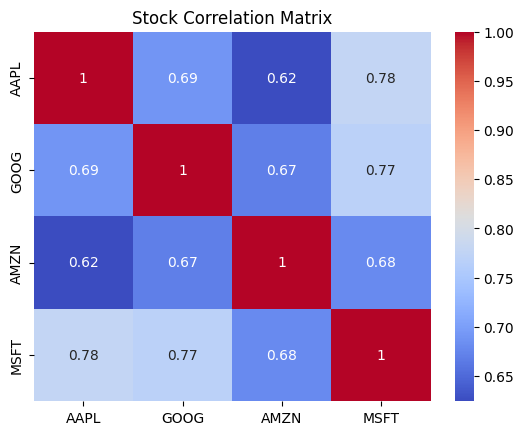

In [4]:
# Covariance matrix (needed for portfolio volatility calculation)
cov_matrix = returns.cov()

# Correlation matrix (optional, to visualize the relationship between assets)
corr_matrix = returns.corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Stock Correlation Matrix")
plt.show()


The graph shows a correlation matrix for four stocks: Apple (AAPL), Google (GOOG), Amazon (AMZN), and Microsoft (MSFT). The colors represent the strength and direction of the correlation between the stocks

Dark red indicate a strong correlation while dark blue indicate strong negative correlation.

#### Portfolio Optimization

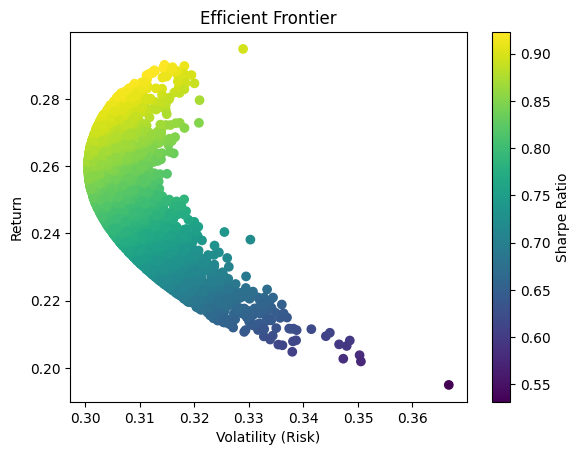

In [5]:
# Define the number of portfolios to simulate
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

# Simulate random portfolios
np.random.seed(42)
for i in range(num_portfolios):
    # Generate random weights for the portfolio
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize weights

    # Expected portfolio return
    portfolio_return = np.sum(returns.mean() * weights) * 252  # Annualized

    # Expected portfolio volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # Annualized

    # Sharpe Ratio (assuming risk-free rate = 0 for simplicity)
    sharpe_ratio = portfolio_return / portfolio_volatility

    # Store the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# Plot the efficient frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.show()


The graph shows the efficient frontier, which represents the set of portfolios that offer the highest expected return for a given level of risk (volatility). The x-axis represents risk, and the y-axis represents return. The color of each point indicates the Sharpe ratio, which measures the risk-adjusted return of a portfolio. Sources and related content

The efficient frontier is a concept in modern portfolio theory that shows the trade-off between risk and return for a set of investments. In simpler terms, it represents the best possible combinations of risk and return that an investor can achieve, given their investment options.

Here's a breakdown of what the graph shows:

- X-axis: Represents the risk or volatility of a portfolio. Higher volatility means higher risk.
- Y-axis: Represents the expected return of a portfolio. Higher return means higher potential profit.
- Scatter plot: Each point on the scatter plot represents a different portfolio combination.
- Efficient frontier line: The curved line represents the efficient frontier. This line shows the portfolios that offer the highest expected return for a given level of risk.
- Color coding: The color of each point indicates the Sharpe ratio of the corresponding portfolio. The Sharpe ratio measures how much return a portfolio generates for each unit of risk. A higher Sharpe ratio means a better risk-adjusted return.


In essence, the efficient frontier helps investors identify the portfolios that offer the best balance between risk and return, based on their specific risk tolerance and investment goals.

#### Find the Optimal Portfolio

In [6]:
# Find the portfolio with the maximum Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]

# Optimal portfolio weights
optimal_weights = weights

# Display results
print(f"Max Sharpe Ratio: {results[2, max_sharpe_idx]}")
print(f"Return: {max_sharpe_return}")
print(f"Volatility: {max_sharpe_volatility}")
print(f"Optimal Weights: {optimal_weights}")


Max Sharpe Ratio: 0.9228311508332626
Return: 0.28849260676057237
Volatility: 0.3126168925919768
Optimal Weights: [0.39089445 0.13782797 0.22206306 0.24921453]


This analysis suggests that the optimal allocation of your investment in these four stocks is to allocate the weights as indicated above. This portfolio is expected to provide a return of 28.85% with a volatility of 31.26%, and it offers the best risk-adjusted return (as measured by the Sharpe ratio) among all possible combinations of these stocks.